## Predict CTR of an Email Campaign

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



In [5]:
df=pd.read_csv(r'C:\Users\richu\Documents\jupyter\E-mail\train_F3fUq2S.csv')
df

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


In [13]:
df.head(5)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [14]:
df.shape

(1888, 22)

In [15]:
df.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [19]:
df['times_of_day'].unique()

array(['Noon', 'Morning', 'Evening'], dtype=object)

In [20]:
df['times_of_day'].value_counts()

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64

## Encoding 

In [22]:
df['times_of_day'].replace('Evening',0,inplace=True)
df['times_of_day'].replace('Noon',1,inplace=True)
df['times_of_day'].replace('Morning',2,inplace=True)


In [26]:
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,1,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,2,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,1,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,1,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [29]:
df.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [30]:
df[df.is_discount>1]

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate


In [31]:
df[df.is_timer>0]

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate


In [33]:
df[df.is_discount>0]

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
68,69,3,98,21569,20,1,0,0,15,13,...,2,0,0,0,1,1,0,0,16,0.000000
72,73,3,98,21569,20,1,0,1,15,13,...,2,0,0,0,1,1,0,0,12,0.004781
384,385,3,99,20663,16,2,0,0,15,13,...,0,0,5,0,1,1,0,1,12,0.010036
385,386,3,102,24438,16,1,0,0,15,13,...,2,0,2,0,0,1,0,0,16,0.004937
386,387,3,86,21258,19,0,0,0,15,13,...,2,0,2,0,0,1,0,0,12,0.005475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,1741,6,173,20622,17,2,0,0,9,34,...,0,0,2,0,0,1,0,0,12,0.011473
1782,1783,10,104,24879,25,6,1,1,15,9,...,0,0,0,0,0,1,0,0,1,0.010315
1783,1784,3,254,43189,15,6,1,2,15,13,...,1,0,0,0,0,1,0,0,12,0.006111
1828,1829,3,104,26220,28,5,1,0,9,34,...,1,0,0,0,0,1,0,0,12,0.006388


In [124]:
df2=df.drop(['is_timer'], axis=1)

In [37]:
df2

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,1,6,26,...,29,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,2,2,11,...,22,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,1,2,11,...,23,1,0,1,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,24,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,1,6,26,...,31,0,0,1,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,1,2,11,...,22,0,0,1,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,0,2,11,...,27,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,0,15,9,...,28,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,0,2,11,...,27,0,0,0,0,0,0,0,16,0.012014


In [38]:
df2.shape

(1888, 21)

## Histogram

Text(0, 0.5, 'Count')

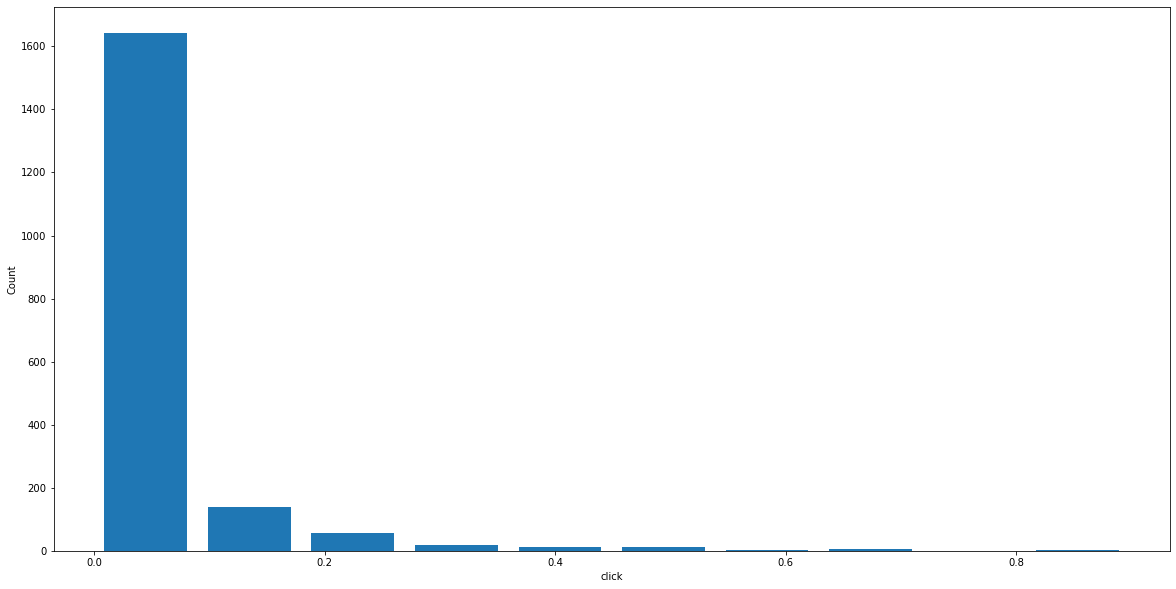

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df2.click_rate,rwidth=0.8)
plt.xlabel("click")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

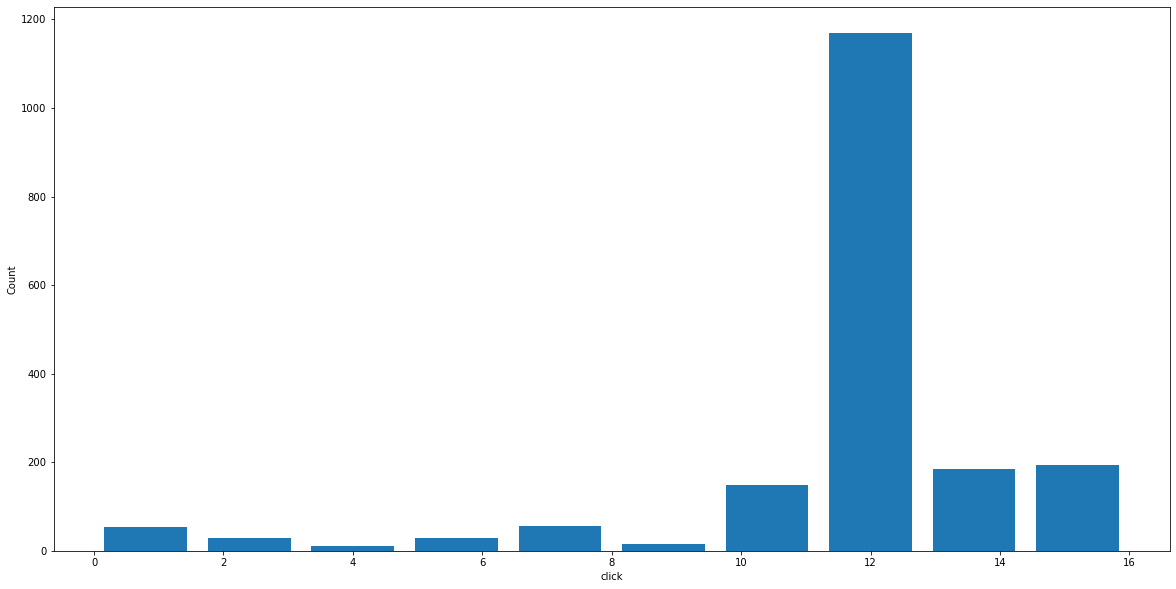

In [148]:
plt.hist(df2.target_audience,rwidth=0.8)
plt.xlabel("click")
plt.ylabel("Count")

In [40]:
df2[df2.mean_paragraph_len>200]

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
1,2,3,54,2570,256,5,1,2,2,11,...,22,0,0,0,0,0,0,0,10,0.700000
5,6,3,54,2569,256,4,0,0,2,11,...,22,0,0,0,0,0,0,0,10,0.500000
6,7,3,54,2570,256,4,0,0,2,11,...,22,0,0,0,0,0,0,0,10,0.457143
1646,1647,3,83,1248,219,2,0,0,15,1,...,19,0,0,0,1,0,0,0,12,0.045554
1659,1660,3,50,1320,223,5,1,2,15,24,...,0,0,0,0,0,0,0,0,2,0.012762
1660,1661,3,69,1409,208,5,1,2,15,24,...,24,0,0,0,0,0,0,0,12,0.010751
1667,1668,3,60,1338,208,3,0,1,9,34,...,27,0,0,0,0,0,0,0,2,0.030698
1668,1669,3,50,1320,223,4,0,2,15,24,...,0,0,0,0,0,0,0,0,2,0.026073
1669,1670,3,69,1400,208,4,0,2,15,24,...,24,0,0,0,0,0,0,0,12,0.022130
1798,1799,10,30,1538,247,2,0,0,9,34,...,73,0,0,0,0,0,0,0,2,0.115789


In [52]:
X = df2.drop(['click_rate'],axis='columns')
X.head(7)

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1,3,76,10439,39,5,1,1,6,26,3,29,0,0,0,0,0,0,0,14
1,2,3,54,2570,256,5,1,2,2,11,0,22,0,0,0,0,0,0,0,10
2,3,3,59,12801,16,5,1,1,2,11,3,23,1,0,1,0,0,0,0,16
3,4,3,74,11037,30,4,0,0,15,9,4,24,0,0,0,0,0,0,0,10
4,5,3,80,10011,27,5,1,1,6,26,3,31,0,0,1,0,0,0,0,14
5,6,3,54,2569,256,4,0,0,2,11,0,22,0,0,0,0,0,0,0,10
6,7,3,54,2570,256,4,0,0,2,11,0,22,0,0,0,0,0,0,0,10


In [50]:
y = df2.click_rate

In [51]:
y.head()

0    0.103079
1    0.700000
2    0.002769
3    0.010868
4    0.142826
Name: click_rate, dtype: float64

## train test

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [130]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.10276328080015928

## K cross validation

In [56]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.15458575, 0.18983694, 0.10039539, 0.16059483, 0.12670208])

## Finding best model using Grid

In [57]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.146423,{'normalize': False}
1,lasso,0.072292,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.155745,"{'criterion': 'mse', 'splitter': 'best'}"


In [ ]:
def predict_ctr(location,sqft,bath,bhk,):    
    

    x[0] = campaign_id    						is_price	is_urgency	target_audience
    x[1] = sender
    x[2] = subject_len
    x[3] = body_len
    x[4] = mean_paragraph_len
    x[5] = day_of_week
    x[6] = is_weekend
    x[7] = times_of_day
    x[8] = category
    x[9] = product
    x[10]= no_of_CTA
    x[11]= mean_CTA_len
    x[12]= is_image
    x[13]= is_personalised
    x[14]= is_quote
    x[15]= is_emoticons
    x[16]= is_discount
    
    
    return lr_clf.predict([x])[0]

## exporting model using pickle

In [65]:
import pickle
with open('ctr_mail.pickle','wb') as f:
    pickle.dump(lr_clf,f)

## loading model

In [68]:
loaded_model= pickle.load(open('ctr_mail.pickle','rb'))

C:\Users\richu\AppData\Local\Temp/ipykernel_11056/2157609990.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='ctr_mail.pickle'>
  loaded_model= pickle.load(open('ctr_mail.pickle','rb'))


## testing set

In [143]:
df5=pd.read_csv('test_Bk2wfZ3.csv')
df5

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,Evening,15,9,...,28,0,0,0,0,0,0,0,0,7
758,2647,3,58,10537,40,3,0,Evening,2,11,...,27,0,0,0,0,0,0,0,0,16
759,2648,3,100,9132,19,2,0,Evening,15,9,...,23,0,0,0,0,0,0,0,0,15
760,2649,3,88,1451,75,1,0,Noon,2,11,...,22,0,0,1,0,0,0,0,0,10


In [144]:
df5=df5.drop(['is_timer'], axis=1)

In [126]:
df5['times_of_day'].replace('Evening',0,inplace=True)
df5['times_of_day'].replace('Noon',1,inplace=True)
df5['times_of_day'].replace('Morning',2,inplace=True)


In [128]:
df5

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,1,6,26,3,37,1,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,2,2,11,0,22,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,0,2,11,0,22,1,0,1,0,0,0,0,10
3,1892,3,88,1473,78,3,0,0,2,11,0,22,1,0,1,0,0,0,0,10
4,1893,3,78,9020,29,3,0,1,6,26,2,40,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2646,3,72,9081,46,0,0,0,15,9,4,28,0,0,0,0,0,0,0,7
758,2647,3,58,10537,40,3,0,0,2,11,5,27,0,0,0,0,0,0,0,16
759,2648,3,100,9132,19,2,0,0,15,9,2,23,0,0,0,0,0,0,0,15
760,2649,3,88,1451,75,1,0,1,2,11,0,22,0,0,1,0,0,0,0,10


## Prediction 

In [139]:
pred = loaded_model.predict(df5)
pred

array([ 1.03547805e-01,  2.01166805e-01,  1.11055030e-01,  1.12502121e-01,
        1.18224686e-01,  8.35575674e-02,  6.51684093e-02,  5.32356143e-02,
        8.13679592e-02,  8.42075241e-02,  6.91904081e-02,  7.78984105e-02,
        8.57221592e-02,  1.13661642e-01,  6.84924048e-02,  3.75356485e-02,
        4.15085593e-02,  8.95953552e-02,  1.08100081e-01,  1.09730475e-01,
        7.41272012e-02,  8.63964715e-02,  5.37365973e-02,  6.61454559e-02,
        8.73871598e-02,  7.17043723e-02,  1.17527037e-01,  2.16903857e-02,
        8.76337683e-02,  7.20475189e-02,  7.98194587e-02,  1.01848476e-01,
        7.40979364e-02,  1.25303234e-01,  8.96952200e-02,  1.13571500e-01,
        7.89952810e-02,  6.27354572e-02,  5.15698909e-02,  9.79197203e-02,
        3.64246585e-02,  8.16173380e-02,  1.16767633e-02,  1.00634670e-01,
        5.23912597e-02,  4.96801465e-02,  1.09314064e-01,  2.92859596e-02,
        9.55525782e-02,  7.91768406e-02,  5.98913528e-02,  3.98695484e-02,
        5.59808052e-02,  

## New DF

In [140]:
submission = pd.DataFrame()
submission['campaign_id'] = df5['campaign_id']
submission['click_rate'] = pred
submission

,campaign_id,click_rate
0,1889,0.103548
1,1890,0.201167
2,1891,0.111055
3,1892,0.112502
4,1893,0.118225
...,...,...
757,2646,0.075157
758,2647,0.114450
759,2648,0.075777
760,2649,0.148411


## Exporting to csv

In [142]:
submission.to_csv('My_Submission.csv',index = False)

In [146]:
pdd = pd.read_csv('My_Submission.csv')
pdd

,campaign_id,click_rate
0,1889,0.103548
1,1890,0.201167
2,1891,0.111055
3,1892,0.112502
4,1893,0.118225
...,...,...
757,2646,0.075157
758,2647,0.114450
759,2648,0.075777
760,2649,0.148411
